In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("C:/Users/yahya/Documents/GitHub/Biomechanical_features_of_orthopedic_patient/column_2C_weka.csv")

In [6]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


array([[<Axes: xlabel='pelvic_incidence', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_tilt numeric', ylabel='pelvic_incidence'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_incidence'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_incidence'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_incidence'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='pelvic_tilt numeric', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt numeric'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='pelvic_tilt numeric', yl

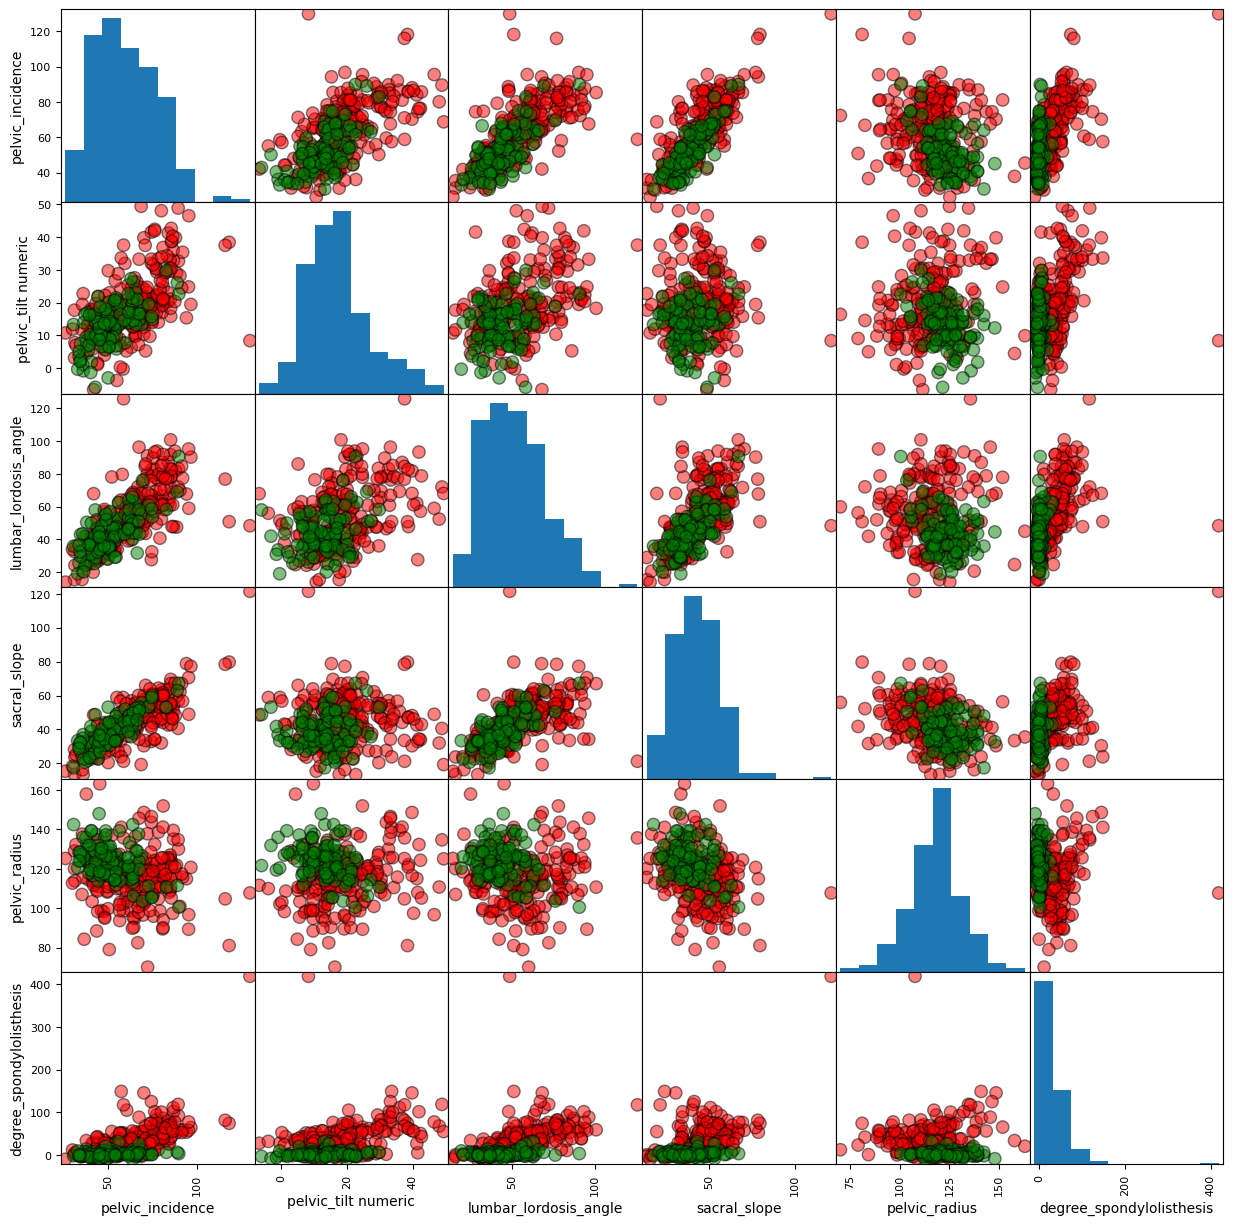

In [9]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:,df.columns != "class"], c = color_list,
                          figsize=[15,15],
                          diagonal='hist',
                          alpha = 0.5,
                          s = 80,
                          marker = '0',
                          edgecolor = "black")

Abnormal    210
Normal      100
Name: class, dtype: int64

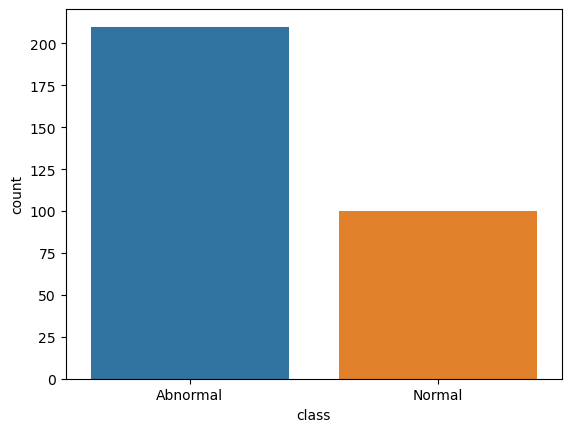

In [11]:
sns.countplot(x = 'class', data = df)
df.loc[:,'class'].value_counts()

In [26]:
df_abnormal = df[df["class"] == 'Abnormal']
X = df_abnormal.loc[:,'pelvic_incidence'].values.reshape(-1,1)
y = df_abnormal.loc[:,'sacral_slope'].values.reshape(-1,1)

In [27]:
y.shape
X.shape

(210, 1)

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y)

LinearRegression()

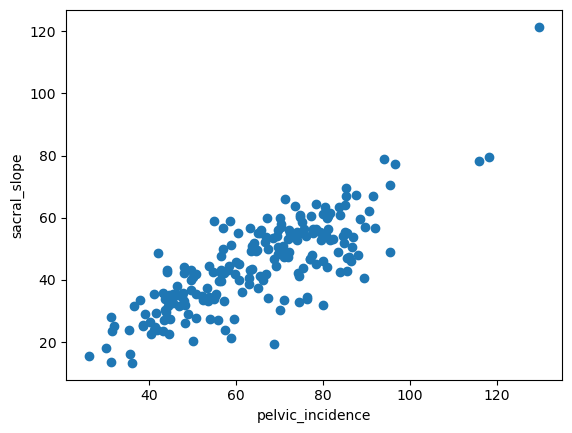

In [29]:
plt.scatter(X,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [30]:
X_test = np.linspace(min(X), max(X)).reshape(-1,1)

In [31]:
y_hat = linear_reg.predict(X_test)
y_hat.shape

(50, 1)

In [33]:
linear_reg.score(X,y)

0.6458410481075871

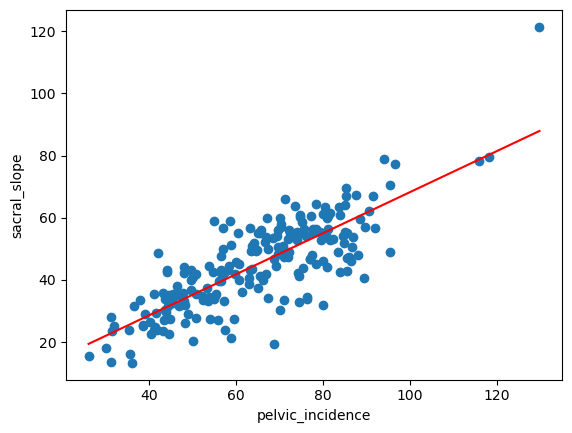

In [34]:
plt.scatter(X,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.plot(X_test, y_hat, color='red')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X,y)

DecisionTreeRegressor()

In [36]:
X_test = np.linspace(min(X), max(X)).reshape(-1,1)
y_hat = tree.predict(X_test)

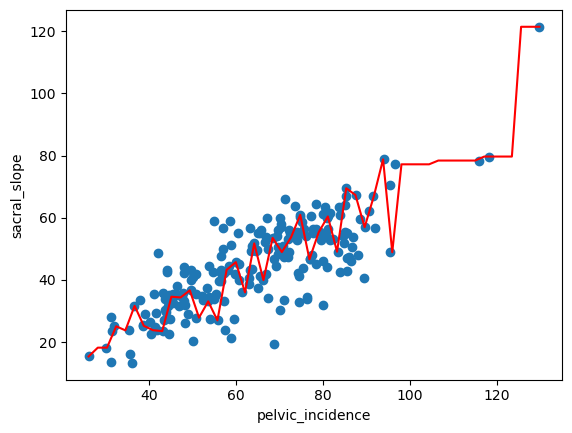

1.0

In [37]:
plt.scatter(X,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.plot(X_test,y_hat,color='red')
plt.show()

tree.score(X,y)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rand_forst = RandomForestRegressor()
rand_forst.fit(X,y)

C:\Users\yahya\AppData\Local\Temp\ipykernel_7120\691947945.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forst.fit(X,y)


RandomForestRegressor()

In [42]:
X_test = np.linspace(min(X),max(X)).reshape(-1,1)
y_hat = rand_forst.predict(X_test)

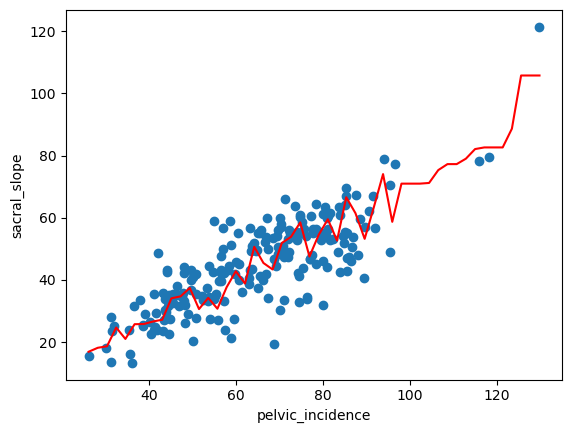

0.926472851748599

In [47]:
plt.scatter(X,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.plot(X_test,y_hat,color='red')
plt.show()

rand_forst.score(X,y)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X)

In [52]:
from sklearn.linear_model import LinearRegression
plr = LinearRegression()
plr.fit(X_poly,y)
y_hat = plr.predict(X_poly)

In [53]:
plr.score(X_poly, y)

0.6492426719559785

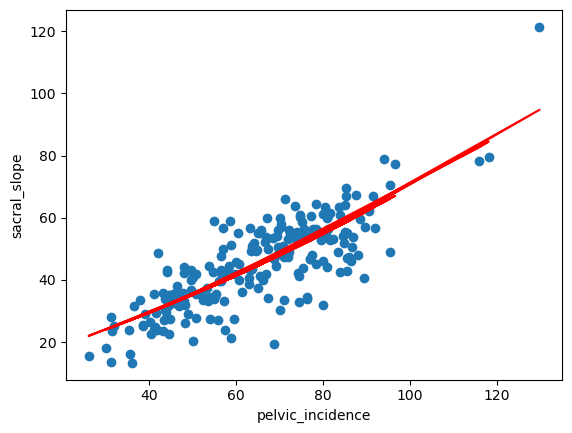

In [55]:
plt.scatter(X,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.plot(X,y_hat,color='red')
plt.show()